# Bike Sharing Assignment

### Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

They want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

#### Steps we will perform:

1. Reading, understanding and visualing the data
2. Preparing the data for modelling (train-test split, rescaling etc)
3. Training the model
4. Residual analysis
5. Predictions and evaluation on the test set

#### Target Variable is "cnt"

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### Read dataset 

In [2]:
df = pd.read_csv("day.csv")

### Data Understanding 

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#shape of dataset

df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


*__Observation__* : Given dataset contains 16 columns and all are non-null.<br>
Most of the columns are int and float.<br>
Dataset also contains one date column as "dteday".

In [6]:

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Cleaning

In [7]:
#know the columns

df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### Identifying unimportant features for prediction:

1. **instant** : This column contains serial no and not important for prediction. Hence this column can be dropped off.
2. **casual & registered** : These columns are not useful in the prediction and also our aim is to find the total count of bikes and not by specific category. So these two columns can be dropped off.
3. **dteday** : This is the date column and we already have seperate columns for 'year' & 'month'in dataset. So this is redundant column and can be dropped off.

### Dropping the unimportant features:


In [8]:
#Store the identified umimportant columns in list:

unimp_col = ['instant','dteday','casual','registered']


In [9]:
#dropping the identified umimportant columns:

df.drop( unimp_col, axis=1, inplace=True)

In [10]:
#Check if columns dropped off..

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Check for missing values:

In [11]:
df.isnull().sum()


season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

**Observation** : No missing values present.

### Check for categorical columns: 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [13]:
#check for no. of unique vales

df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

**Observation** : <br>
 1. Categorical Variables are : season, yr, mnth, holiday, weekday, workingday, weathersit.
 2. Numerical Variables are : temp, atemp, hum , windspeed.

## Data Visualisation 

### Analysing Categorical Variables:

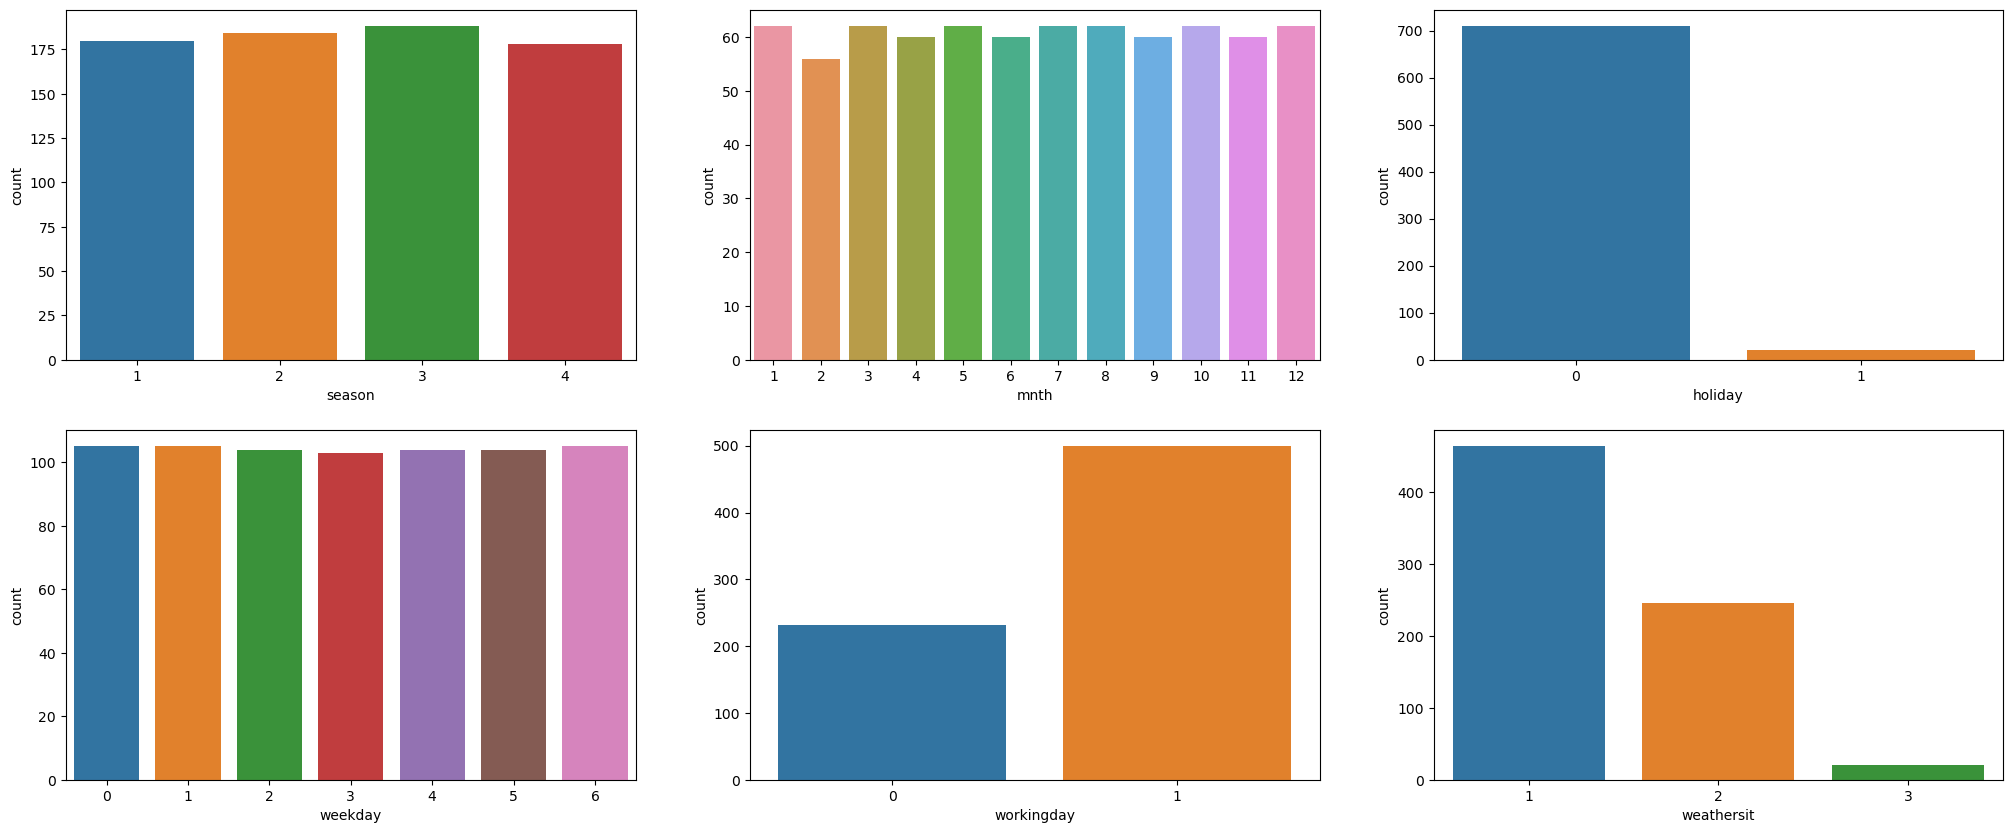

In [14]:
#Plot Countplot for categories

plt.figure(figsize=(25, 10))

plt.subplot(2,3,1)
sns.countplot(x="season", data=df)

plt.subplot(2,3,2)
sns.countplot(x="mnth", data=df)

plt.subplot(2,3,3)
sns.countplot(x="holiday", data=df)

plt.subplot(2,3,4)
sns.countplot(x="weekday", data=df)

plt.subplot(2,3,5)
sns.countplot(x="workingday", data=df)

plt.subplot(2,3,6)
sns.countplot(x="weathersit", data=df)

plt.show()

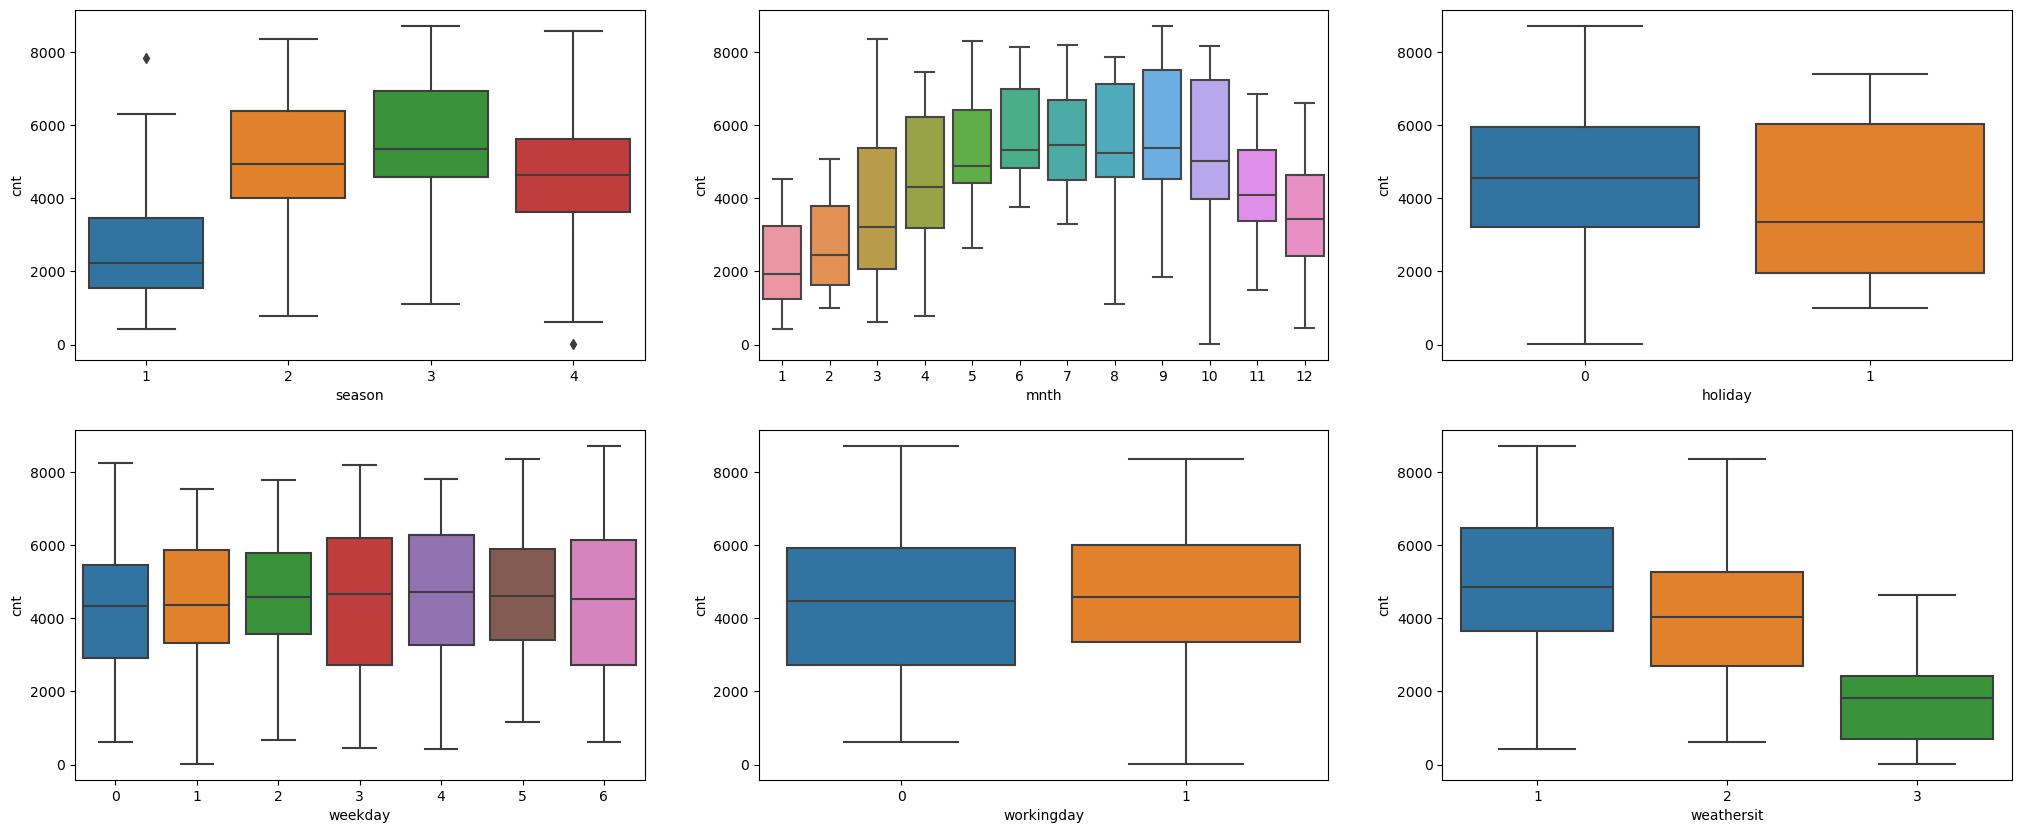

In [15]:
#Plot box plots for categorical variables:

plt.figure(figsize=(25, 10))

plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)

plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)

plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)

plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)

plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)

plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)

plt.show()

**Observation** :<br>
1. **season** : category 3 i.e.,fall have highest number of bike hiring.
2. **month** :  month may, june, july, aug, sept have higher number of booking i.e., greater than 4000.
3. **holiday** : Majority of booking are done when there is no holiday. Hence, this column can be bias towards no holiday and cannot be use for prediction.
4. **weekday** : All days are having close trend.
5. **workingday** : Majority of the bike booking were happening in ‘workingday’ with a median of close to 5000.
6. **weathersit** : Category 1 have highest no of bike booking, category 2 have second highest no of booking while category 3 have lowest.

### Analysing Numerical Variables:

#### Pairplot 

<Figure size 1500x3000 with 0 Axes>

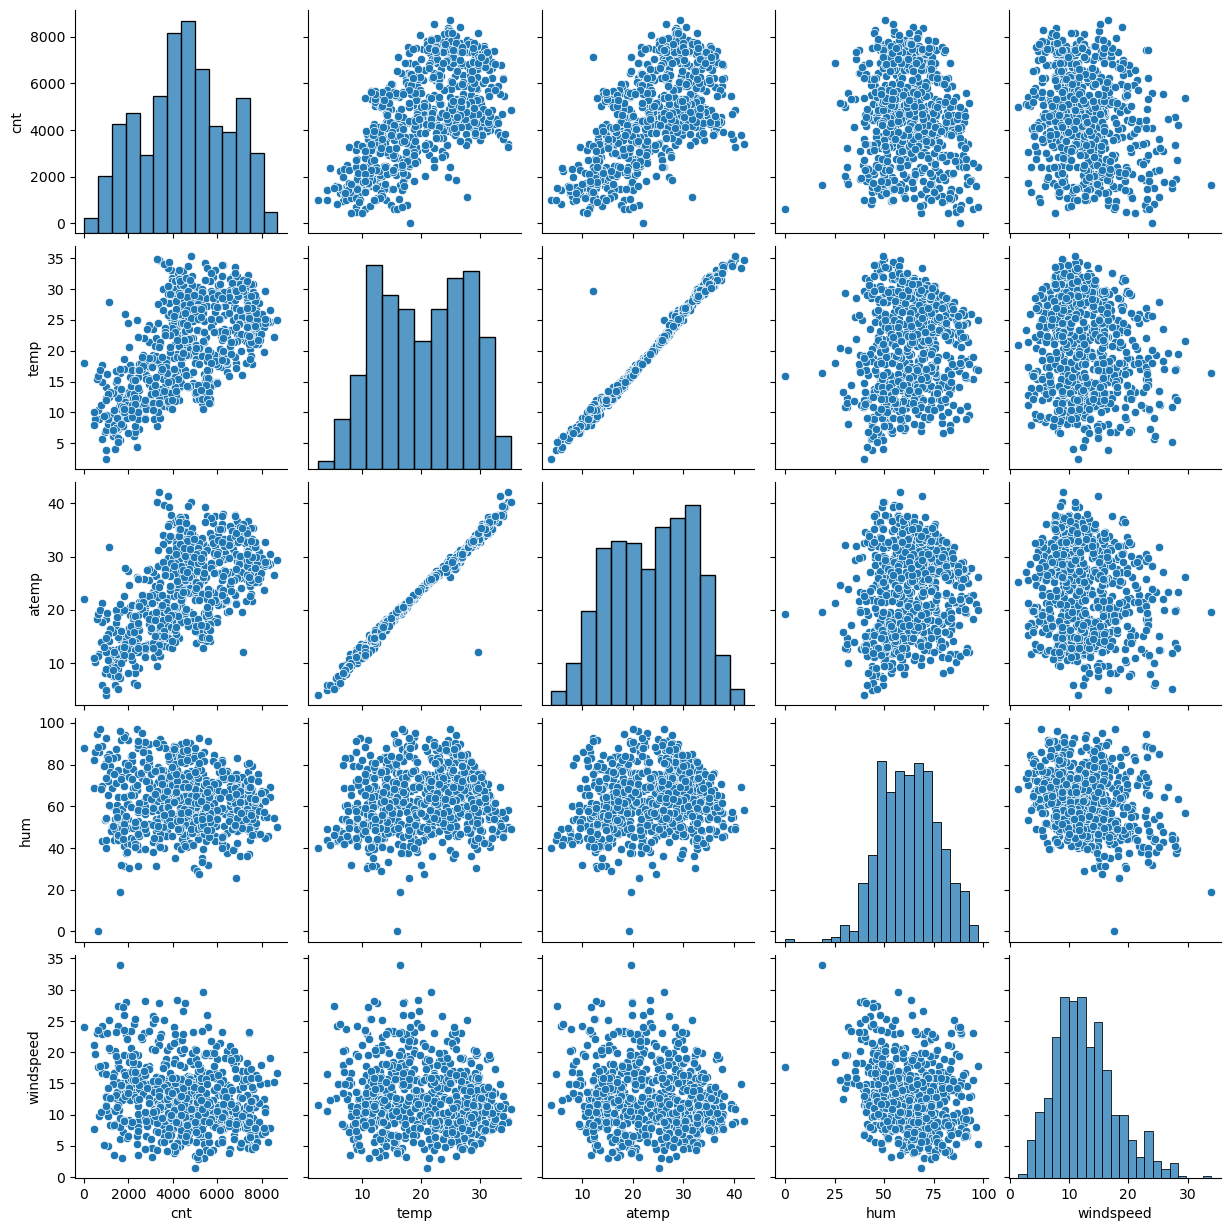

In [16]:
plt.figure(figsize = (15,30))
sns.pairplot(data=df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

**Observation** :<br>
1. w.r.t target variable "cnt", atemp and temp are highly correlated with cnt while humidity and windspeed doen't show good correlation with cnt.
2. temp and atemp have linear relationship with each other.

### Finding Correlation

In [17]:
#find out correlation between different variables:

corr = df.corr(method ='pearson')
corr

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


### Plotting Heatmap

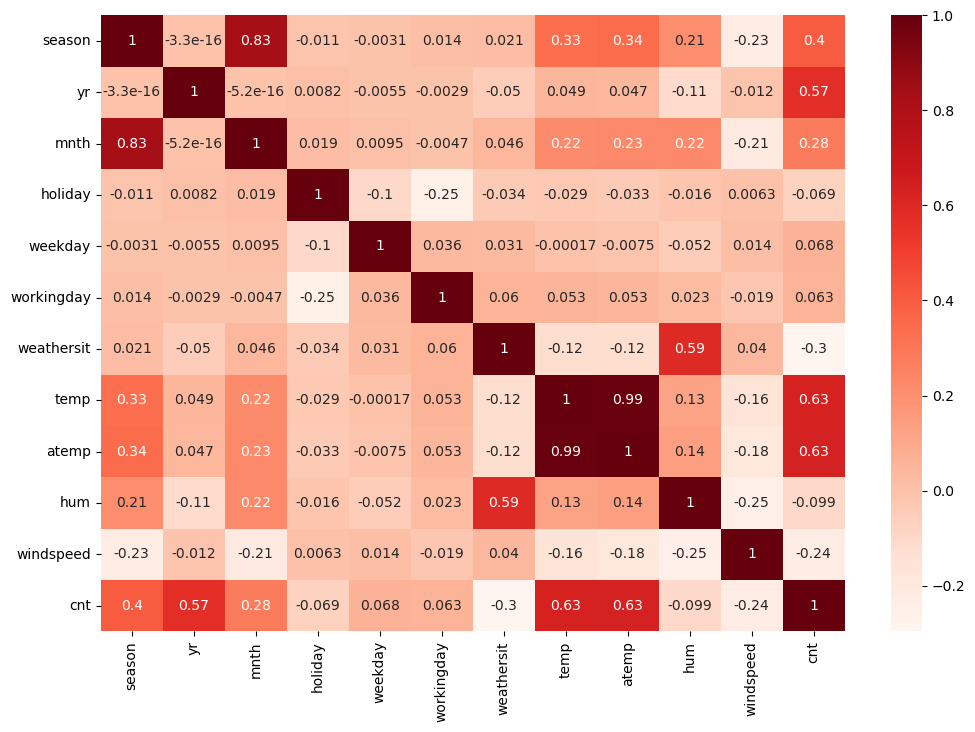

In [18]:
#View correlation obtained in heatmap:

plt.figure(figsize=(12, 8))
sns.heatmap(corr,annot=True,cmap='Reds')
plt.show()

**Observation** :<br>
1. 'temp' and 'atemp' have good correlation with target variable.
2. workingday, weekday and holiday have lowest correlation with target variable.


### Creating Dummy Variables for Categories:

In [19]:
df = pd.get_dummies(data=df ,columns=["season","mnth","weekday","weathersit"],drop_first=True)


In [20]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


In [21]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

**Observation** : All categories are converted into integer.

### Splitting the Data into Training and Testing Sets

In [23]:

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)


In [24]:
df_train.shape

(510, 30)

In [25]:
df_test.shape

(219, 30)

### Feature Scaling

In [26]:
#check the df before scaling:

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,1,1,0


In [27]:
scaler = MinMaxScaler()

In [28]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

scaling_var = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[scaling_var] = scaler.fit_transform(df_train[scaling_var])


In [29]:
#Check df_train after scaling

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0


In [30]:
#check for min and max value are between 0 and 1 or not:

df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 Scaling done.

### Dividing into X and Y sets for the model building

In [31]:
y_train = df_train.pop('cnt')
X_train = df_train


In [32]:
# Running RFE with the output number of the variable equal to 14

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=14)            # running RFE
rfe = rfe.fit(X_train, y_train)

In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 2),
 ('season_4', True, 1),
 ('mnth_2', False, 8),
 ('mnth_3', False, 3),
 ('mnth_4', False, 5),
 ('mnth_5', False, 4),
 ('mnth_6', False, 6),
 ('mnth_7', False, 9),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 10),
 ('mnth_12', False, 11),
 ('weekday_1', False, 12),
 ('weekday_2', False, 13),
 ('weekday_3', False, 15),
 ('weekday_4', False, 16),
 ('weekday_5', False, 14),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [34]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [35]:
X_train.columns[~rfe.support_]

Index(['atemp', 'season_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [36]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Building model using Statsmodel for the detailed statistical analysis:

### Model 1

In [37]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [38]:
# Print a summary of the linear regression model 1:

print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Sat, 29 Jul 2023   Prob (F-statistic):          3.24e-192
Time:                        21:19:43   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1945      0.029      6.770   

**Observation** : All features have p-value = 0 except for holiday = 0.032, mnth_8 = 0.001

#### VIF

In [39]:
# Check for the VIF values:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a df containing the names of all the feature and their VIFs:

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
4,hum,16.59
3,temp,10.01
2,workingday,5.05
5,windspeed,3.82
7,season_4,2.27
12,weathersit_2,2.14
0,yr,2.03
11,weekday_6,1.90
6,season_2,1.83
10,mnth_10,1.62


**Observation**: Humidity have highest vif follwed by temp and then workingday.

### Model 2

#### Dropping humidity as its vif is highest

In [40]:
#Dropping humidity

X_train_new = X_train_rfe.drop(["hum"], axis = 1)

In [41]:
#model building

# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()


In [42]:
# Print a summary of the linear regression model 2:

print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Sat, 29 Jul 2023   Prob (F-statistic):          6.16e-189
Time:                        21:19:43   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0945      0.019      4.961   

### VIF

In [43]:

# Creating a df containing the names of all the feature and their VIFs:

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.38
2,workingday,4.39
4,windspeed,3.60
0,yr,2.02
6,season_4,2.02
5,season_2,1.82
10,weekday_6,1.77
9,mnth_10,1.62
7,mnth_8,1.59
11,weathersit_2,1.54


#### Dropping "holiday" variable since it has high p-value

### Model 3

In [44]:
#Dropping holiday

X_train_new = X_train_new.drop(["holiday"], axis = 1)


In [45]:
#model building

# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [46]:
# Print a summary of the linear regression model 3:

print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.2
Date:                Sat, 29 Jul 2023   Prob (F-statistic):          2.86e-189
Time:                        21:19:43   Log-Likelihood:                 506.56
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     497   BIC:                            -932.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0856      0.019      4.610   

In [47]:
# Creating a df containing the names of all the feature and their VIFs:

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.26
1,workingday,4.07
3,windspeed,3.49
0,yr,2.02
5,season_4,1.99
4,season_2,1.82
9,weekday_6,1.70
8,mnth_10,1.61
6,mnth_8,1.59
10,weathersit_2,1.54


#### Dropping "mnth_8" variable since it has high p-value

### Model 4

In [48]:
#Dropping holiday

X_train_new = X_train_new.drop(["mnth_8"], axis = 1)


In [49]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [50]:
# Print a summary of the linear regression model 4:

print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     232.4
Date:                Sat, 29 Jul 2023   Prob (F-statistic):          4.15e-188
Time:                        21:19:43   Log-Likelihood:                 500.98
No. Observations:                 510   AIC:                            -978.0
Df Residuals:                     498   BIC:                            -927.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0787      0.019      4.224   

In [51]:
# Creating a df containing the names of all the feature and their VIFs:

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,temp,4.86
1,workingday,4.07
3,windspeed,3.43
0,yr,2.02
5,season_4,1.91
8,weekday_6,1.70
7,mnth_10,1.60
4,season_2,1.57
9,weathersit_2,1.53
6,mnth_9,1.22


**Observation** : Now our model looks good since all p-value are 0 and VIF of variables are less than 5.<br> So now we can finalise this model for our prediction.

## Validating Assumptions of Linear Regression

### 1. There is a linear relationship between X and Y

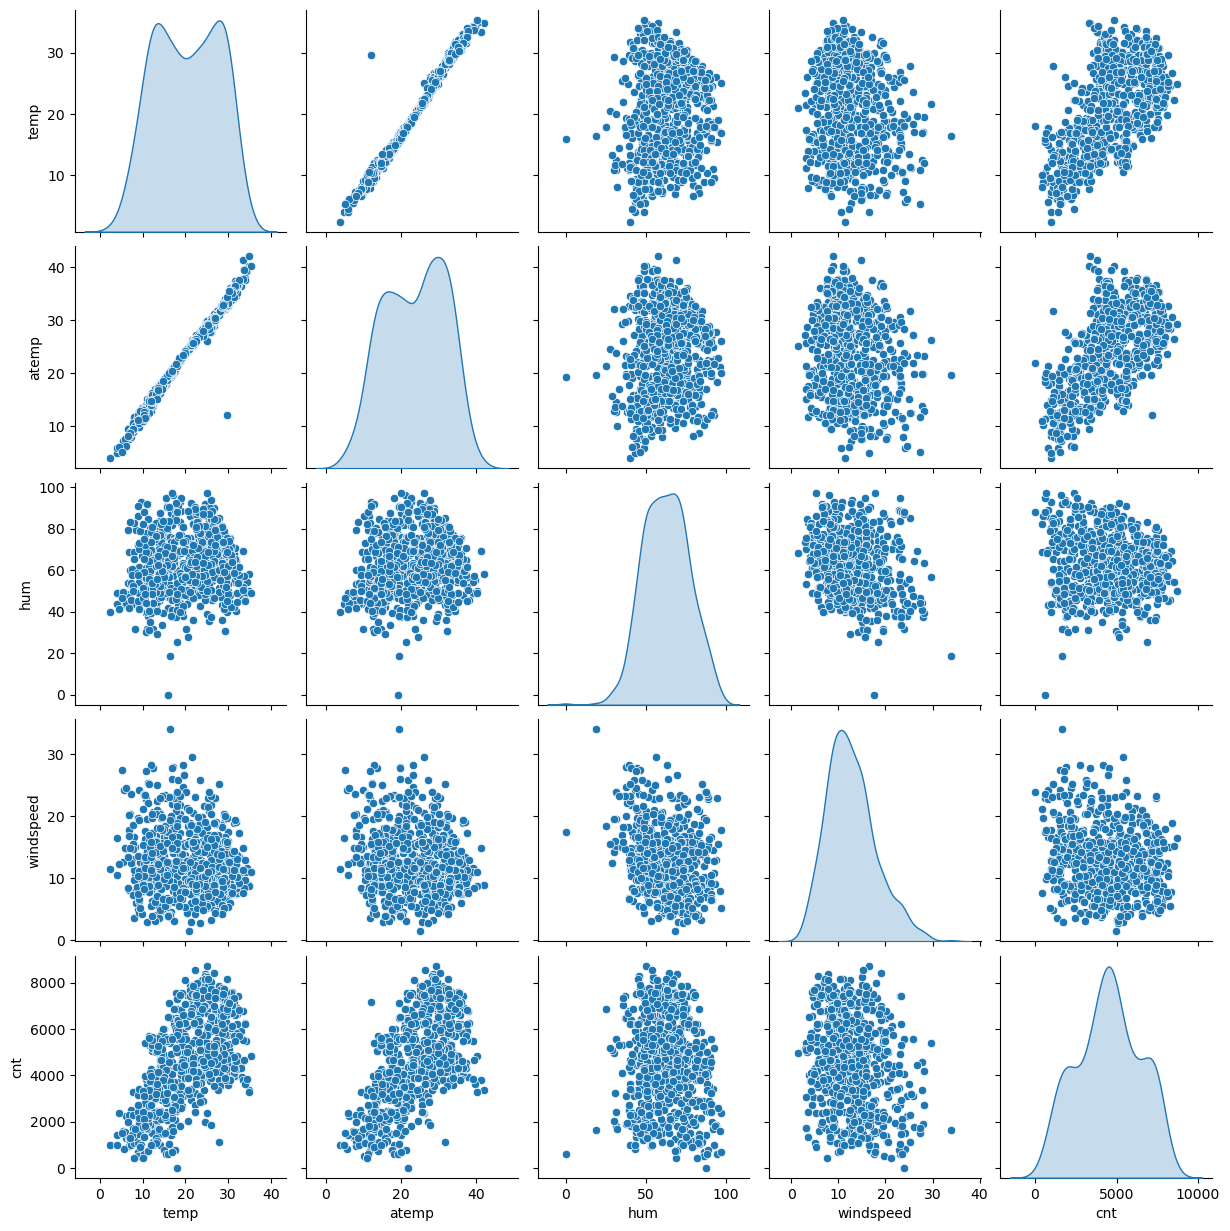

In [52]:
df = df[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(df, diag_kind='kde')
plt.show()

**Observation** : We can see there is linesr relationship between atemp and temp with cnt i.e.,target variable.<br>
Hence, this assumption is valid.

## 2. Error terms are normally distributed with mean zero

### Residual Analysis of the train data

In [53]:
y_train_pred = lr4.predict(X_train_lm4)

Text(0.5, 0, 'Errors')

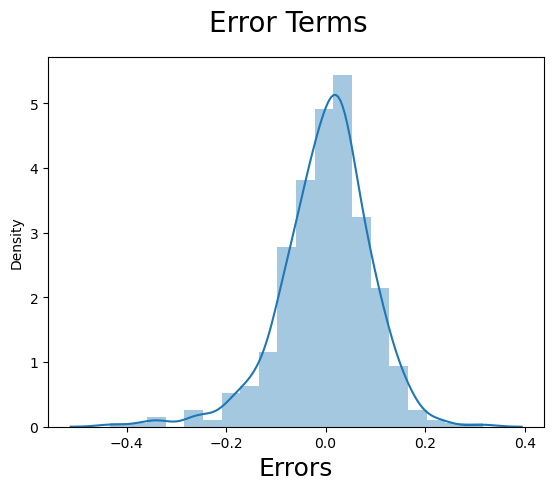

In [54]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  


**Observation** : Error terms are normally distributed.<br>Hence assumption of "Error terms are normally distributed with mean zero" is valid.

## 3. No Multicollinearity between the predictor variables.

In [55]:
# Check for the VIF values of the feature variables.

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.86
1,workingday,4.07
3,windspeed,3.43
0,yr,2.02
5,season_4,1.91
8,weekday_6,1.70
7,mnth_10,1.60
4,season_2,1.57
9,weathersit_2,1.53
6,mnth_9,1.22


**Observation** : All features have VIF value below 5.<br> Hence, there is no multicollinearity present between variables and this assumption is valid.


##  Making Predictions:

### Applying the scaling on the test sets

In [56]:
scaling_var = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[scaling_var] = scaler.transform(df_test[scaling_var])


In [57]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,...,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,...,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
df.head()

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985
1,14.902598,17.68695,69.6087,16.652113,801
2,8.050924,9.47025,43.7273,16.636703,1349
3,8.200000,10.60610,59.0435,10.739832,1562
4,9.305237,11.46350,43.6957,12.522300,1600


#### Dividing into X_test and y_test

In [59]:
y_test = df_test.pop('cnt')
X_test = df_test

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null   

In [60]:
#Selecting the variables present in final model.
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm4 = sm.add_constant(X_test)

X_test_lm4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_2      219 non-null    uint8  
 6   season_4      219 non-null    uint8  
 7   mnth_9        219 non-null    uint8  
 8   mnth_10       219 non-null    uint8  
 9   weekday_6     219 non-null    uint8  
 10  weathersit_2  219 non-null    uint8  
 11  weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


In [61]:
# Predicting using lr4 model:

y_pred = lr4.predict(X_test_lm4)

## Evaluation of Model

Text(0, 0.5, 'y_pred')

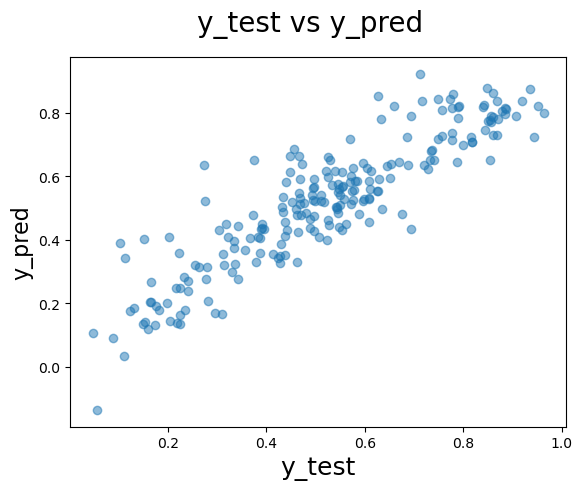

In [62]:

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 


### R-Squared Value

In [63]:
r2 = r2_score(y_test, y_pred)
print('R-square = ',r2)

R-square =  0.800311476453566


### Calculating Adjusted R-Square Value

In [64]:
X_test.shape

(219, 11)

In [65]:
#n is number of rows in X
n = X_test.shape[0]
print("n = ",n)

# Number of features
p = X_test.shape[1]
print("p = ",p)

n =  219
p =  11


In [66]:
#Calculating adjusted R-square:

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print("Adjusted_r-square = ",adjusted_r2)

Adjusted_r-square =  0.7897000090187314


## Equation of our Best Fit Line:

##### cnt = (0.2333 x yr) + (0.0570 x workingday) + (0.5436 x temp)  - (0.1575 x windspeed) + (0.0882 x season_2) + (0.1201 x season_4) + (0.1012 x mnth_9) + (0.0330 x mnth_10) + (0.0684 x weekday_6) - (0.0821 x weathersit_2) - (0.2935 x weathersit_3) + 0.0787

In [67]:
#Comparing R-square and adjusted R-square values of train and test dataset:

print("R-Square value on Train data = 0.837",)
print("Adjusted R-Square value on Train data = 0.833")
print("\nR-Square value on Test data = ",r2)
print("Adjusted R-Square value on Test data = ",adjusted_r2)


R-Square value on Train data = 0.837
Adjusted R-Square value on Train data = 0.833

R-Square value on Test data =  0.800311476453566
Adjusted R-Square value on Test data =  0.7897000090187314


## Conclusion:

Top 5 Features of our Final Model are:
1. "Temperature" with 0.5436 as coeff value
2. "Weathersit_3" with -0.2936 as coeff value
3. "Year" with 0.2333 as coeff value
4. "Windspeed" with -0.1542 as coeff value
5. "season_4" with 0.1260 as coeff value

#### Hence these 5 variables should be responsible for maximum bike booking and these variables should be consider with high importance.
